## Data Cleaning Notebook

In order to get insights from the given data frame, in this first step, some cleaning will be done. Summary: eliminating the null values, identifying outiers, finding correlation, etc.

# 1. Data import & raw data information.

In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", None)

In [2]:
df=pd.read_csv('archive/attacks.csv', encoding='latin1')

df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [3]:
dim_orig=df.shape
dim_orig

(25723, 24)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [5]:
# Let's change the columns names so we can call them later:

df.columns=[c.lower().replace(' ', '_') for c in df.columns] 
df.columns=[c.lower().replace('.', '_') for c in df.columns] 
df.columns=[c.lower().replace(':', '') for c in df.columns] 
df.columns=[c.lower().replace('/', 'O') for c in df.columns] 
df.columns=[c.lower().replace('(', '') for c in df.columns] 
df.columns=[c.lower().replace(')', '') for c in df.columns] 

df.head()

,case_number,date,year,type,country,area,location,activity,name,sex_,age,injury,fatal_yon,time,species_,investigator_or_source,pdf,href_formula,href,case_number_1,case_number_2,original_order,unnamed_22,unnamed_23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


# 2. Data Cleaning.
### Null Values

In [6]:
nan_cols=df.isnull().sum()
nan_cols[nan_cols>0]     # all of the columns have null values.

case_number               17021
date                      19421
year                      19423
type                      19425
country                   19471
area                      19876
location                  19961
activity                  19965
name                      19631
sex_                      19986
age                       22252
injury                    19449
fatal_yon                 19960
time                      22775
species_                  22259
investigator_or_source    19438
pdf                       19421
href_formula              19422
href                      19421
case_number_1             19421
case_number_2             19421
original_order            19414
unnamed_22                25722
unnamed_23                25721
dtype: int64

In [7]:
df_orig=df.copy()

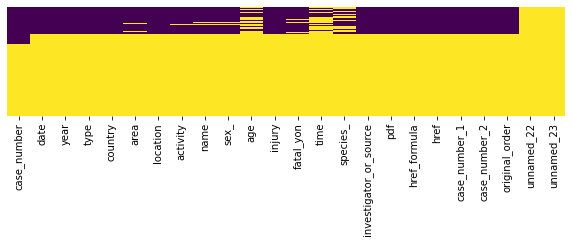

In [8]:
#Let's display this in a plot, so we can see more grpahycally the null values per column:

import pylab as plt
import seaborn as sns
plt.figure(figsize=(10,2))

sns.heatmap(df.isna(), # mapa de calor
            yticklabels=False,
            cmap='viridis',
            cbar=False)

plt.show();

In [9]:
df.fillna({'unnamed_22': 'Columna no contiene información', 'unnamed_23': 'Columna no contiene información'}, inplace=True)

In [10]:
df[df.unnamed_23.str.contains('Teramo')].head()

,case_number,date,year,type,country,area,location,activity,name,sex_,age,injury,fatal_yon,time,species_,investigator_or_source,pdf,href_formula,href,case_number_1,case_number_2,original_order,unnamed_22,unnamed_23
4415,1952.03.30,30-Mar-1952,1952.0,Unprovoked,NETHERLANDS ANTILLES,Curacao,NaN,Went to aid of child being menaced by the shark,A.J. Eggink,M,NaN,"Buttock bitten, tissue removed",N,NaN,"Bull shark, 2.7 m [9'] was captured & dragged ...","J. Randall, p.352 in Sharks & Survival; H.D. B...",1952.03.30-Eggink.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1952.03.30,1952.03.30,1888.0,Columna no contiene información,Teramo


In [11]:
df[df.unnamed_23.str.contains('change filename')].head()

,case_number,date,year,type,country,area,location,activity,name,sex_,age,injury,fatal_yon,time,species_,investigator_or_source,pdf,href_formula,href,case_number_1,case_number_2,original_order,unnamed_22,unnamed_23
5840,1878.09.14.R,Reported 14-Sep-1878,1878.0,Provoked,USA,Connecticut,"Branford, New Haven County",Fishing,Captain Pattison,M,NaN,Leg bitten by netted shark PROVOKED INCIDENT,N,NaN,NaN,"St. Joseph Herald, 9/14/1878",1878.09.14.R-Pattison.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1878.09.14.R,1878.09.14.R,463.0,Columna no contiene información,change filename


In [12]:
qty_of_nuls = 20
df.iloc[df[(df.isnull().sum(axis=1)>qty_of_nuls)].index]

,case_number,date,year,type,country,area,location,activity,name,sex_,age,injury,fatal_yon,time,species_,investigator_or_source,pdf,href_formula,href,case_number_1,case_number_2,original_order,unnamed_22,unnamed_23
6309,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Columna no contiene información,Columna no contiene información
6310,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Columna no contiene información,Columna no contiene información
6311,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Columna no contiene información,Columna no contiene información
6312,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Columna no contiene información,Columna no contiene información
6313,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Columna no contiene información,Columna no contiene información
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Columna no contiene información,Columna no contiene información
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Columna no contiene información,Columna no contiene información
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Columna no contiene información,Columna no contiene información
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Columna no contiene información,Columna no contiene información


In [13]:
# As there are lots of rows with null values, let's eliminate those rows with more than 20 nulls:

df = df.drop(df[df.isnull().sum(axis=1) > 20].index)

In [14]:
df.shape

(6309, 24)

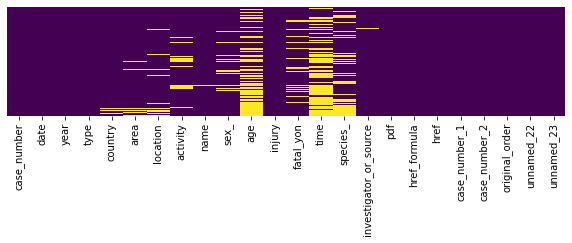

In [15]:
# Now we can see that our date looks a little bit better. But there are more nulls yet to eliminate:

plt.figure(figsize=(10,2))

sns.heatmap(df.isna(), # mapa de calor
            yticklabels=False,
            cmap='viridis',
            cbar=False)

plt.show();

Following the aim of the analysis, let's eliminate those rows where we do not know whether the victim was killed or not; 
the type of shark specie; the sex of the victim or the activity that the victim was done while the attack.

In [16]:
index_yon=df[df['fatal_yon'].isna()].index
df.drop(index=index_yon,inplace=True)

In [17]:
index_species_=df[df['species_'].isna()].index
df.drop(index=index_species_,inplace=True)

In [18]:
index_sex_=df[df['sex_'].isna()].index
df.drop(index=index_sex_,inplace=True)

In [19]:
index_activity=df[df['activity'].isna()].index
df.drop(index=index_activity,inplace=True)

In [20]:
df.shape

(2628, 24)

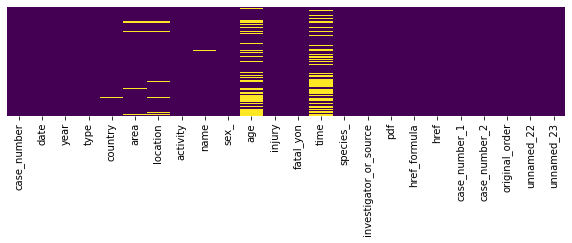

In [21]:
# The result DataFrame is now cleaner. Instead of keeping deleting rows with null values, let's go one by one column:

plt.figure(figsize=(10,2))

sns.heatmap(df.isna(), # mapa de calor
            yticklabels=False,
            cmap='viridis',
            cbar=False)

plt.show();

In [22]:
nan_cols=df.isnull().sum()
nan_cols[nan_cols>0] 

country                     5
area                       90
location                   99
name                       12
age                       698
time                      941
investigator_or_source      5
dtype: int64

In [23]:
df.fillna({'country':'unknown','area':'unknown','location':'unknown','name':'unknown','age':0, 'time':'unknown','investigator_or_source':'unknown',}, inplace=True)

In [24]:
nan_cols=df.isnull().sum()
nan_cols[nan_cols>0] 

Series([], dtype: int64)

In [25]:
df.head(1)

,case_number,date,year,type,country,area,location,activity,name,sex_,age,injury,fatal_yon,time,species_,investigator_or_source,pdf,href_formula,href,case_number_1,case_number_2,original_order,unnamed_22,unnamed_23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,Columna no contiene información,Columna no contiene información


# 3.Determination of data type per column:

**case_number** --> This would be usefull for each case identification. As we have the index for identifying each case,
let's take this column as irrelevant. That is why it is not going to be cleaned. Column type will be unchanged and it 
will remain as "Object".

**date** --> This must be in date time as data type. Let's going to fix it.

**year** --> This column should be integer. Let's going to fix it.

**type** --> Let's fix this column so the type of attack is reduced to 5-6 different attacks.

**country** --> Let's fix this column so no repeated countries are found.

**area & location** --> For the purpose of this analysis we do not need extactly to know the location and area in each country. So let's just solve the null values.

**activity** --> Let's try to clean this column so no same activities are described differently.

**name** --> Irrelevant for our purpose. With the age and sex we have enough information about the victims.

**age** --> Let's clean this column so at the end all the values of the columns are integers.

**fatal** --> This should be boolean. True if it was fatal and False if it was not fatal.

**time** --> Irrelevant for our purpose.

**species** --> Irrelevant for our purpose.

**Rest of the columns** --> Irrelevant ofr our purpose.

In [26]:
df.country.unique()

array(['USA', 'AUSTRALIA', 'MEXICO', 'BRAZIL', 'ENGLAND', 'COSTA RICA',
       'MALDIVES', 'SOUTH AFRICA', 'THAILAND', 'BAHAMAS', 'ECUADOR',
       'NEW CALEDONIA', 'MALAYSIA', 'CUBA', 'NEW ZEALAND', 'SPAIN',
       'EGYPT', 'REUNION', 'UNITED KINGDOM', 'PHILIPPINES', 'INDONESIA',
       'COLUMBIA', 'FRENCH POLYNESIA', 'UNITED ARAB EMIRATES', 'FIJI',
       'JAPAN', 'ST. MARTIN', 'FRANCE', 'BELIZE', 'JAMAICA', 'TONGA',
       'SCOTLAND', 'ITALY', 'TAIWAN', 'PAPUA NEW GUINEA', 'RUSSIA',
       'SEYCHELLES', 'TURKS & CAICOS', 'MALTA', 'VIETNAM', 'MOZAMBIQUE',
       'GUAM', 'CROATIA', 'PANAMA', 'SOLOMON ISLANDS', 'NORWAY',
       'Sierra Leone', 'ATLANTIC OCEAN', 'ST. MAARTIN', 'GRAND CAYMAN',
       'CHINA', 'VANUATU', 'SOUTH KOREA', 'MADAGASCAR', ' TONGA',
       'URUGUAY', 'VENEZUELA', 'INDIA', 'MICRONESIA', 'CANADA', 'OKINAWA',
       'TANZANIA', 'MARSHALL ISLANDS', 'MAURITIUS', 'SENEGAL',
       'EGYPT / ISRAEL', 'HONG KONG', 'CHILE', 'CARIBBEAN SEA', 'ANGOLA',
       'Fiji', 'IRAN'

In [27]:
df['country']=df['country'].replace('Sierra Leone','SIERRA LEONE')

In [28]:
df['country']=df['country'].replace('ST. MAARTIN','ST. MARTIN')

In [29]:
df['country']=df['country'].replace('Fiji','FIJI')

In [30]:
df['country']=df['country'].replace(' TONGA','TONGA')

In [31]:
df['country']=df['country'].replace('SOUTH CHINA SEA','CINHA')

In [32]:
df.area.unique()

array(['California', 'New South Wales', 'Colima', 'Pernambuco', 'Florida',
       'Queensland', 'Cornwall', 'Westerm Australia', 'Cocos Island',
       'Western Australia', 'Alifu Alifu Atoll', 'Western Cape Province',
       'Hawaii', 'Hua Hin', 'New Providence', 'Alagoas', 'unknown',
       'Eastern Cape Province', 'Victoria', 'KwaZulu-Natal',
       'Boi Island, Victoria', 'Galapagos Islands', 'Fernando de Noronha',
       'Sepang', 'Holquin Province', 'South Australia', 'North Island',
       'Canary Islands', 'Massachusetts', 'South Carolina',
       'Red Sea Protectorate', 'Majorca', 'Washington', 'Tabasco',
       'South Devon', 'New Providence ', 'Luzon Island', 'Great Exuma',
       'Bimini', 'Bali', 'Alicante Province', 'Abaco Islands',
       'Isla Provedencia', 'Texas', 'North Carolina', 'Suez', 'Tuamotos',
       'Grand Terre', 'Santa Catarina State', 'Balneário Camboriú',
       'Fujairah Emirate', 'Grand Canary Island', 'Phuket', 'Tasmania',
       'Grand Bahama Island',

In [33]:
df.location.unique()

array(['Oceanside, San Diego County', 'Arrawarra Headland', 'La Ticla',
       ..., 'Shatt-el Arab River near a small boat stand',
       'East of the Ras Tanura-Jubail area ', '            '],
      dtype=object)

In [34]:
df.name.unique()

array(['Julie Wolfe', 'male', 'Gustavo Ramos ', ...,
       'Occupant:     Mr. Maciotta', 'a servant', 'Arab boy'],
      dtype=object)

In [35]:
df.age.unique()

array(['57', 0, '18', '52', '15', '32', '21', '34', '30', '60', '33',
       '29', '54', '56', '12', '19', '25', '10', '69', '38', '55', '35',
       '46', '45', '14', '40s', '28', '20', '24', '26', '49', '22', '7',
       '31', '40', '13', '37', '50', '48', '17', '58', '65', '73', '36',
       '60s', '51', '43', '61', '59', '42', '6', '23', '39', '41', '11',
       '71', '44', '27', '62', '68', '9', '16', '47', '63', '70',
       '18 months', '53', '20s', '30s', 'Teen', '66', '74', '64',
       '28 & 26', '8', 'teen', '18 or 20', '46 & 34', '77', '84', '\xa0 ',
       ' ', '30 or 36', '6½', '21 & ?', '5', ' 30', ' 28', '20?', "60's",
       '32 & 30', '>50', 'adult', '9 months', '25 to 35', '23 & 26',
       '33 & 37', '30 & 32', '17 & 35', '13 or 18', ' 43', '"young"',
       '7 or 8', 'Both 11', '9 or 10', '13 or 14'], dtype=object)

In [36]:
(df[df['age']=='20s'].index.values)

array([502, 881], dtype=int64)

In [37]:
df.loc[[502, 881],"age"]=20

In [38]:
(df[df['age']=='30s'].index.values)

array([ 509, 1481, 1526, 2634, 2635], dtype=int64)

In [39]:
df.loc[[509, 1481, 1526, 2634, 2635],"age"]=30

In [40]:
(df[df['age']=='28 & 26'].index.values)

array([698], dtype=int64)

In [41]:
df.loc[[698],"age"]=27

In [42]:
(df[df['age']=='18 or 20'].index.values)

array([1325], dtype=int64)

In [43]:
df.loc[[1325],"age"]=19

In [44]:
(df[df['age']=='46 & 34'].index.values)

array([1506], dtype=int64)

In [45]:
df.loc[[1506],"age"]=19

In [46]:
df.drop(df[df.age=='\xa0 '].index, axis=0, inplace=True)

In [47]:
df.drop(df[df.age==' '].index, axis=0, inplace=True)

In [48]:
df.drop(df[df.age=='6½'].index, axis=0, inplace=True)

In [49]:
df.drop(df[df.age=='adult'].index, axis=0, inplace=True)

In [50]:
df.drop(df[df.age=='9 months'].index, axis=0, inplace=True)

In [51]:
df.drop(df[df.age=='"young"'].index, axis=0, inplace=True)

In [52]:
df.drop(df[df.age=='Teen'].index, axis=0, inplace=True)

In [53]:
df.drop(df[df.age=='teen'].index, axis=0, inplace=True)

In [54]:
df.drop(df[df.age=='18 months'].index, axis=0, inplace=True)

In [55]:
df.drop(df[df.age=='17 & 35'].index, axis=0, inplace=True)

In [56]:
df.drop(df[df.age==0].index, axis=0, inplace=True)

In [57]:
(df[df['age']=='20?'].index.values)

array([2441], dtype=int64)

In [58]:
df.loc[[2441],"age"]=20

In [59]:
(df[df['age']=='23 & 26'].index.values)

array([3742], dtype=int64)

In [60]:
df.loc[[3742],"age"]=25

In [61]:
(df[df['age']=='21 & ?'].index.values)

array([1925], dtype=int64)

In [62]:
df.loc[[1925],"age"]=21

In [63]:
(df[df['age']=="60s"].index.values)

array([219], dtype=int64)

In [64]:
df.loc[[2496],"age"]=60

In [65]:
(df[df['age']=='32 & 30'].index.values)

array([2511], dtype=int64)

In [66]:
df.loc[[2511],"age"]=31

In [67]:
(df[df['age']=='>50'].index.values)

array([3364], dtype=int64)

In [68]:
df.loc[[3364],"age"]=50

In [69]:
(df[df['age']=='25 to 35'].index.values)

array([3646], dtype=int64)

In [70]:
df.loc[[3646],"age"]=30

In [71]:
(df[df['age']=='33 & 37'].index.values)

array([3880], dtype=int64)

In [72]:
df.loc[[3880],"age"]=35

In [73]:
(df[df['age']=='30 & 32'].index.values)

array([4009], dtype=int64)

In [74]:
df.loc[[4009],"age"]=31

In [75]:
(df[df['age']=='13 or 18'].index.values)

array([4075], dtype=int64)

In [76]:
df.loc[[4075],"age"]=15

In [77]:
(df[df['age']==' 43'].index.values)

array([4405], dtype=int64)

In [78]:
df.loc[[4405],"age"]=43

In [79]:
(df[df['age']=='7 or 8'].index.values)

array([4489], dtype=int64)

In [80]:
df.loc[[4489],"age"]=7

In [81]:
(df[df['age']=='Both 11'].index.values)

array([4801], dtype=int64)

In [82]:
df.loc[[4801],"age"]=11

In [83]:
(df[df['age']=='9 or 10'].index.values)

array([4818], dtype=int64)

In [84]:
df.loc[[4818],"age"]=9

In [85]:
(df[df['age']=='13 or 14'].index.values)

array([6265], dtype=int64)

In [86]:
df.loc[[6265],"age"]=13

In [87]:
(df[df['age']=='40s'].index.values)

array([ 48, 468], dtype=int64)

In [88]:
df.loc[[48, 468],"age"]=40

In [89]:
(df[df['age']=='60s'].index.values)

array([219], dtype=int64)

In [90]:
df.loc[[219],"age"]=60

In [91]:
(df[df['age']=='30 or 36'].index.values)

array([1881], dtype=int64)

In [92]:
df.loc[[1881],"age"]=33

In [93]:
(df[df['age']==' 28'].index.values)

array([2434], dtype=int64)

In [94]:
df.loc[[2434],"age"]=28

In [95]:
(df[df['age']==' 30'].index.values)

array([2259], dtype=int64)

In [96]:
df.loc[[2259],"age"]=30

In [97]:
df.age.unique()

array(['57', '18', '52', '15', '32', '21', '34', '30', '60', '33', '29',
       '54', '56', '12', '19', '25', '10', '69', '38', '55', '35', '46',
       '45', '14', 40, '28', '20', '24', '26', '49', '22', '7', '31',
       '40', '13', '37', '50', '48', '17', '58', '65', '73', '36', 60,
       '51', '43', '61', '59', '42', '6', '23', '39', '41', '11', '71',
       '44', '27', '62', '68', '9', '16', '47', '63', '70', '53', 20, 30,
       '66', '74', '64', 27, '8', 19, '77', '84', 33, 21, '5', 28, 31, 50,
       25, 35, 15, 43, 7, 11, 9, 13], dtype=object)

In [98]:
df['age'] = df['age'].astype('int')

In [99]:
df.year.unique()

array([2018., 2017., 2016., 2015., 2014., 2013., 2012., 2011., 2010.,
       2009., 2008., 2007., 2006., 2005., 2004., 2003., 2002., 2001.,
       2000., 1999., 1998., 1997., 1996., 1995., 1994., 1993., 1992.,
       1991., 1990., 1989., 1988., 1987., 1986., 1985., 1984., 1983.,
       1982., 1981., 1980., 1979., 1978., 1977., 1976., 1975., 1974.,
       1973., 1972., 1971., 1970., 1969., 1968., 1967., 1966., 1965.,
       1964., 1963., 1962., 1961., 1960., 1959., 1958., 1957., 1956.,
       1955., 1954., 1953., 1952., 1951., 1950., 1949., 1948., 1947.,
       1946., 1945., 1944., 1943., 1942., 1941., 1940., 1939., 1938.,
       1937., 1936., 1935., 1934., 1933., 1932., 1931., 1930., 1929.,
       1928., 1927., 1926., 1925., 1924., 1922., 1919., 1916., 1912.,
       1906., 1905., 1901., 1899., 1898., 1894., 1892., 1880., 1879.,
       1878., 1868.,    0.])

In [100]:
df['year'] = df['year'].astype('int')

In [101]:
df.year.value_counts()

2015    80
2012    62
2007    58
2002    55
2013    53
        ..
1901     1
1906     1
1912     1
1919     1
1924     1
Name: year, Length: 111, dtype: int64

In [102]:
df.sex_.value_counts()

M      1663
F       253
lli       1
Name: sex_, dtype: int64

In [103]:
df.drop(df[df.sex_=='lli'].index, axis=0, inplace=True)

In [104]:
df.type.value_counts()

Unprovoked      1664
Provoked         202
Boating           28
Invalid           11
Sea Disaster       9
Boat               2
Name: type, dtype: int64

In [105]:
df['type']=df['type'].replace('Boating','Boat')

In [106]:
df.fatal_yon.value_counts()

N       1617
Y        294
 N         3
M          1
2017       1
Name: fatal_yon, dtype: int64

In [107]:
df['fatal_yon']=df['fatal_yon'].replace(' N','N')

In [108]:
df.drop(df[df.fatal_yon=='M'].index, axis=0, inplace=True)

In [109]:
df.drop(df[df.fatal_yon=='2017'].index, axis=0, inplace=True)

In [110]:
df.shape

(1914, 24)

In [111]:
df['fatal_yon']=df['fatal_yon'].replace('Y',True)

In [112]:
df['fatal_yon']=df['fatal_yon'].replace('N',False)

In [113]:
df.species_.value_counts().head(5)

White shark    94
Tiger shark    44
Bull shark     38
4' shark       36
6' shark       28
Name: species_, dtype: int64

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1914 entries, 0 to 6276
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case_number             1914 non-null   object 
 1   date                    1914 non-null   object 
 2   year                    1914 non-null   int32  
 3   type                    1914 non-null   object 
 4   country                 1914 non-null   object 
 5   area                    1914 non-null   object 
 6   location                1914 non-null   object 
 7   activity                1914 non-null   object 
 8   name                    1914 non-null   object 
 9   sex_                    1914 non-null   object 
 10  age                     1914 non-null   int32  
 11  injury                  1914 non-null   object 
 12  fatal_yon               1914 non-null   bool   
 13  time                    1914 non-null   object 
 14  species_                1914 non-null   

In [115]:
df['date']=df['date'].replace('July 2006','01-Jul-2006')

In [116]:
df['date']=df['date'].replace('Nov-1999','01-Nov-1999')

In [117]:
df['date']=df['date'].replace(' 07-Sep-2013','07-Sep-2013')

In [118]:
df['date']=df['date'].replace('9-Mar-2018','09-Mar-2018')

In [119]:
df['date']=df['date'].replace('Jan-1985','01-Jan-1985')

In [120]:
df['date']=df['date'].replace('Reported      10-Nov-1983','10-Nov-1983')

In [121]:
df['date']=df['date'].replace('Sep-1974','01-Sep-1974')

In [122]:
df['date']=df['date'].replace('5-Jul-1975','05-Jul-1975')

In [123]:
df['date']=df['date'].replace('Sep-1975','01-Sep-1975')

In [124]:
df['date']=df['date'].replace('Reported 02-Jun-1976','02-Jun-1976')

In [125]:
df['date']=df['date'].replace('Mar-1973','01-Mar-1973')

In [126]:
df['date']=df['date'].replace('Apr-1980','01-Apr-1980')

In [127]:
df['date']=df['date'].replace(' 01-Dec-1979','01-Dec-1979')

In [128]:
df['date']=df['date'].replace('Reported 02-Sep-1978','02-Sep-1978')

In [129]:
df['date']=df['date'].replace('Jun-1993','01-Jun-1993')

In [130]:
df['date']=df['date'].replace('Nov-1991','01-Nov-1991')

In [131]:
df['date']=df['date'].replace('Reported 12-Nov-1992','12-Nov-1992')

In [132]:
df['date']=df['date'].replace('Oct-1988','01-Oct-1988')

In [133]:
df['date']=df['date'].replace('Jul-1986','01-Jul-1986')

In [134]:
df['date']=df['date'].replace('Oct-1986','01-Oct-1986')

In [135]:
df['date']=df['date'].replace('Jan-1991','01-Jan-1991')

In [136]:
df['date']=df['date'].replace('July 1991','01-Jul-1991')

In [137]:
df['date']=df['date'].replace('6-Dec-1951','06-Dec-1951')

In [138]:
df['date']=df['date'].replace('Reported    06-Aug-1989','06-Aug-1989')

In [139]:
df['date']=df['date'].replace('6-Dec-1951','06-Dec-1951')

In [140]:
df['date']=df['date'].replace('Reported 03-Sep-1953','03-Sep-1953')

In [141]:
df['date']=df['date'].replace('Jul-1950','01-Jul-1950')

In [142]:
df['date']=df['date'].replace('Reported 27-Jul-1947','27-Jul-1947')

In [143]:
df['date']=df['date'].replace('Mar-1948','01-Mar-1948')

In [144]:
df['date']=df['date'].replace('Aug-1948','01-Aug-1948')

In [145]:
df['date']=df['date'].replace('Dec-1949','01-Dec-1949')

In [146]:
df['date']=df['date'].replace('Jul-1958','01-Jul-1958')

In [147]:
df['date']=df['date'].replace('07-Mar-1925 or 27-Mar-1925','07-Mar-1925')

In [148]:
df['date']=df['date'].replace('Feb-1927','01-Feb-1927')

In [149]:
df['date']=df['date'].replace('Jan-1928','01-Jan-1928')

In [150]:
df['date']=df['date'].replace('Reported 24-Oct-1878','24-Oct-1878')

In [151]:
df['date']=df['date'].replace('Reported 25-Oct-1939','25-Oct-1939')

In [152]:
df['date']=df['date'].replace('Sep-1940','01-Sep-1940')

In [153]:
df['date']=df['date'].replace('Between 18 & 22-Dec 1944','22-Dec-1944')

In [154]:
df['date']=df['date'].replace('May-Jun-1965','05-Jun-1965')

In [155]:
df['date']=df['date'].replace('Feb-1964','01-Feb-1964')

In [156]:
df['date']=df['date'].replace('May 1964','01-May 1964')

In [157]:
df['date']=df['date'].replace('Aug-1964','01-Aug-1964')

In [158]:
df['date']=df['date'].replace('Aug-1966','01-Aug-1966')

In [159]:
df['date']=df['date'].replace('Reported      19-Feb-1996','19-Feb-1996')

In [160]:
df['date']=df['date'].replace('Mar-1996','01-Mar-1996')

In [161]:
df['date']=df['date'].replace('5-Mar-1986','05-Mar-1986')

In [162]:
df['date']=df['date'].replace('7-Dec-1952','07-Dec-1952')

In [163]:
df['date']=df['date'].replace('8-Sep-1966','08-Sep-1966')

In [164]:
df['date']=df['date'].replace('Reported 17-Feb-1969','17-Feb-1969')

In [165]:
df['date']=df['date'].replace('Reported 16-Apr-1971','16-Apr-1971')

In [166]:
df['date']=df['date'].replace('Aug-1967','01-Aug-1967')

In [167]:
df['date']=df['date'].replace('Jul-1961','01-Jul-1961')

In [168]:
df['date']=df['date'].replace('Oct-1959','01-Oct-1959')

In [169]:
df['date']=df['date'].replace('Reported 06-Sep-1961','06-Sep-1961')

In [170]:
df['date']=df['date'].replace('Aug-1963','01-Aug-1963')

In [171]:
df['date']=df['date'].replace('Aug-1962','01-Aug-1962')

In [172]:
df['date']=df['date'].replace('  29-Oct-2011','29-Oct-2011')

In [173]:
df['date']=df['date'].replace('  29-Jul-2013','29-Jul-2013')

In [174]:
df['date']=df['date'].replace(' 05-Aug-2013','05-Aug-2013')

In [175]:
df['date']=df['date'].replace(' 14-Aug-2013','14-Aug-2013')

In [176]:
df['date']=df['date'].replace(' 01-Sep-2013','01-Sep-2013')

In [177]:
df['date']=df['date'].replace(' 12-Sep-2013','12-Sep-2013')

In [178]:
df['date']=df['date'].replace(' 14-Sep-2013','14-Sep-2013')

In [179]:
df['date']=df['date'].replace(' 14-Sep-2013','14-Sep-2013')

In [180]:
df['date']=df['date'].replace('31-July-2009','31-Jul-2009')

In [181]:
df['date']=df['date'].replace('Reported 14-Oct-2009','14-Oct-2009')

In [182]:
df['date']=df['date'].replace('Reported 16-Mar-2009','16-Mar-2009')

In [183]:
df['date']=df['date'].replace('Reported 28-Feb-2011','28-Feb-2011')

In [184]:
df['date']=df['date'].replace(' 27-Mar-2010','27-Mar-2010')

In [185]:
df['date']=df['date'].replace(' 13-Sep-2010','13-Sep-2010')

In [186]:
df['date']=df['date'].replace('Reported 09-Mar-2017','09-Mar-2017')

In [187]:
df['date']=df['date'].replace('Reported 08-Jul-2016','08-Jul-2016')

In [188]:
df['date']=df['date'].replace('Reported 06-May-2017','06-May-2017')

In [189]:
df['date']=df['date'].replace('Reported 10-Apr-2018','10-Apr-2018')

In [190]:
df['date']=df['date'].replace('Reported 07-Jun-2017','07-Jun-2017')

In [191]:
df['date']=df['date'].replace('Reported 07-Jul-2017','07-Jul-2017')

In [192]:
df['date']=df['date'].replace('Reported 31-Oct-2017','31-Oct-2017')

In [193]:
df['date']=df['date'].replace('Reported 12-Sep-2014','12-Sep-2014')

In [194]:
df['date']=df['date'].replace('Reported 27-Jun-2014','27-Jun-2014')

In [195]:
df['date']=df['date'].replace('Reported 25-Jun-2015','25-Jun-2015')

In [196]:
df['date']=df['date'].replace('Reported  24-Jan-2001','24-Jan-2001')

In [197]:
df['date']=df['date'].replace('Reported 06-Aug-2002','06-Aug-2002')

In [198]:
df['date']=df['date'].replace('Reported 20-Dec-1998','20-Dec-1998')

In [199]:
df['date']=df['date'].replace('13 -Nov-1999','13-Nov-1999')

In [200]:
df['date']=df['date'].replace('Reported 16-Sep-1999','16-Sep-1999')

In [201]:
df['date']=df['date'].replace('Reported 05-Mar-2007','05-Mar-2007')

In [202]:
df['date']=df['date'].replace('Reported 17-May-2007','17-May-2007')

In [203]:
df['date']=df['date'].replace('19-Jul-2007.a','19-Jul-2007')

In [204]:
df['date']=df['date'].replace('19-Jul-2007.b','19-Jul-2007')

In [205]:
df['date']=df['date'].replace('Reported 28-Jan-2006','28-Jan-2006')

In [206]:
df['date']=df['date'].replace('Reported      27-Sep-2005','27-Sep-2005')

In [207]:
df['date']=df['date'].replace('Reported 14-Jun-2013','14-Jun-2013')

In [208]:
df['date']=df['date'].replace('Reported 28-Oct-2011','28-Oct-2011')

In [209]:
df.drop(df[df.date=='1960s'].index, axis=0, inplace=True)

In [210]:
df.drop(df[df.date=='1975'].index, axis=0, inplace=True)

In [211]:
df.drop(df[df.date=='1981'].index, axis=0, inplace=True)

In [212]:
df.drop(df[df.date=='Summer 1980'].index, axis=0, inplace=True)

In [213]:
df.drop(df[df.date=='1988'].index, axis=0, inplace=True)

In [214]:
df.drop(df[df.date=='Mid Jul-1985 or mid Jul-1986'].index, axis=0, inplace=True)

In [215]:
df.drop(df[df.date=='1986'].index, axis=0, inplace=True)

In [216]:
df.drop(df[df.date=='Summer 1948'].index, axis=0, inplace=True)

In [217]:
df.drop(df[df.date=='Summer 1950'].index, axis=0, inplace=True)

In [218]:
df.drop(df[df.date=='Ca. 1955'].index, axis=0, inplace=True)

In [219]:
df.drop(df[df.date=='1956'].index, axis=0, inplace=True)

In [220]:
df.drop(df[df.date=='1932'].index, axis=0, inplace=True)

In [221]:
df.drop(df[df.date=='1941-1942'].index, axis=0, inplace=True)

In [222]:
df.drop(df[df.date=='No date, Before  1975'].index, axis=0, inplace=True)

In [223]:
df.drop(df[df.date=='Before 2009'].index, axis=0, inplace=True)

In [224]:
df.drop(df[df.date=='1989'].index, axis=0, inplace=True)

In [225]:
df.drop(df[df.date=='1945'].index, axis=0, inplace=True)

In [226]:
df.drop(df[df.date=='1942'].index, axis=0, inplace=True)

In [227]:
df.drop(df[df.date=='1938'].index, axis=0, inplace=True)

In [228]:
df.drop(df[df.date=='Ca. 1955 '].index, axis=0, inplace=True)

In [229]:
df.drop(df[df.date=='1898'].index, axis=0, inplace=True)

In [230]:
df.drop(df[df.date=='1971'].index, axis=0, inplace=True)

In [231]:
df.drop(df[df.date=='1961'].index, axis=0, inplace=True)

In [232]:
df.drop(df[df.date=='December 2012'].index, axis=0, inplace=True)

In [233]:
df.drop(df[df.date=='May 2018'].index, axis=0, inplace=True)

In [234]:
df.drop(df[df.date=='Sep-1998'].index, axis=0, inplace=True)

In [235]:
df.drop(df[df.date=='1999'].index, axis=0, inplace=True)

In [236]:
df.drop(df[df.date=='Mar-2000'].index, axis=0, inplace=True)

In [237]:
df.drop(df[df.date=='May-2007'].index, axis=0, inplace=True)

In [238]:
df.drop(df[df.date=='Late Jul-2008'].index, axis=0, inplace=True)

In [239]:
df.drop(df[df.date=='Summer-2008'].index, axis=0, inplace=True)

In [240]:
df.drop(df[df.date=='Early 1930s'].index, axis=0, inplace=True)

In [241]:
df.drop(df[df.date=='22-Jul-144'].index, axis=0, inplace=True)

In [242]:
df.drop(df[df.date=='Before 1962'].index, axis=0, inplace=True)

In [243]:
df.date.value_counts()[0:60]

31-May-1997    3
12-Apr-2001    3
08-Sep-2000    3
24-Jun-2015    3
31-Dec-1999    3
20-Sep-2015    3
18-Aug-2001    3
28-Dec-1961    3
23-Jan-1970    3
31-Oct-2003    3
09-Jul-1994    3
01-Jul-1991    3
20-Apr-2003    3
21-Dec-2015    2
09-Jun-2000    2
06-Nov-2000    2
02-Jul-2000    2
09-Apr-2006    2
27-Jul-1958    2
14-May-2014    2
04-Apr-1965    2
01-Feb-2006    2
01-Jun-2014    2
09-Jun-2014    2
16-Apr-2005    2
13-Aug-1983    2
25-Jul-1983    2
16-Aug-2011    2
21-Sep-2002    2
01-Jul-2006    2
01-Nov-1999    2
17-Jan-1959    2
05-Oct-2002    2
23-Aug-1966    2
05-Aug-1999    2
09-Oct-2004    2
18-Jan-2012    2
16-May-2009    2
16-Jun-1988    2
27-Dec-1966    2
14-Mar-2012    2
17-Aug-2011    2
22-Aug-1989    2
29-Aug-2015    2
05-Oct-2014    2
24-Jul-1982    2
25-Mar-2002    2
07-Jun-1991    2
21-May-2011    2
15-Mar-2002    2
02-Oct-2014    2
26-Jun-1982    2
27-Jul-1952    2
30-Nov-2010    2
01-Dec-2010    2
01-Jan-2002    2
10-May-1990    2
24-Aug-2005    2
03-Sep-2001   

for i,row in df.iterrows():
    print(i, row['date'])

In [245]:
df.shape

(1880, 24)

In [246]:
df.date=pd.to_datetime(df.date)

In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1880 entries, 0 to 5922
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   case_number             1880 non-null   object        
 1   date                    1880 non-null   datetime64[ns]
 2   year                    1880 non-null   int32         
 3   type                    1880 non-null   object        
 4   country                 1880 non-null   object        
 5   area                    1880 non-null   object        
 6   location                1880 non-null   object        
 7   activity                1880 non-null   object        
 8   name                    1880 non-null   object        
 9   sex_                    1880 non-null   object        
 10  age                     1880 non-null   int32         
 11  injury                  1880 non-null   object        
 12  fatal_yon               1880 non-null   bool    

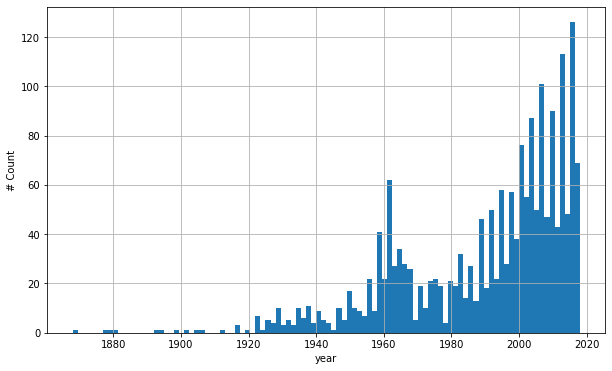

In [248]:
plt.figure(figsize=(10, 6))

df.year.hist(bins=100)

plt.ylabel('# Count')
plt.xlabel('year');

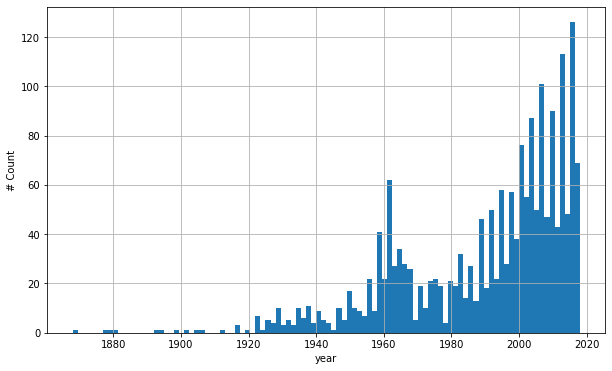

In [249]:
plt.figure(figsize=(10, 6))

data=df[df.year>1550].year

data.hist(bins=100)

plt.ylabel('# Count')
plt.xlabel('year');

## Insigt Nº1

Conclusión: sesgo temporal. No han incrementado los ataques de tiburones a lo largo de los años. Simplemente hay más datos.

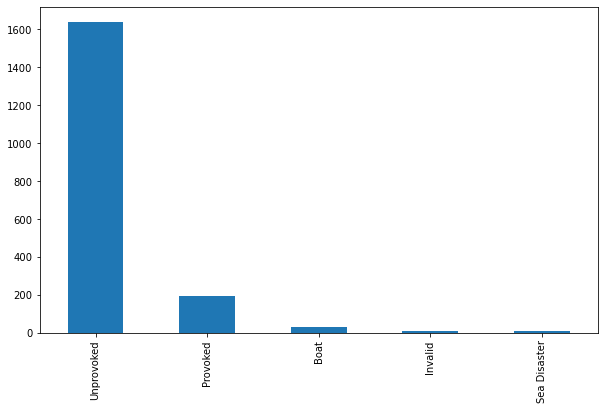

In [250]:
plt.figure(figsize=(10, 6))

df.type.value_counts().plot.bar();

## Insight Nº2

Conclusión: La gran mayoría de los ataques son no provocados. El tiburón ataca por propia supervivencia. No porque alguien le ataque.

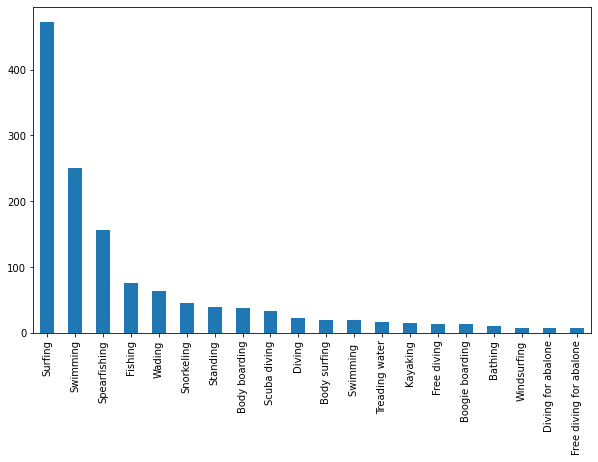

In [251]:
plt.figure(figsize=(10, 6))

df.activity.value_counts().head(20).plot.bar();

## Insight Nº3

Conclusión: Los ataques se producen mientras la víctima realiza una actividad en el medio natural de los tiburones: el mar.

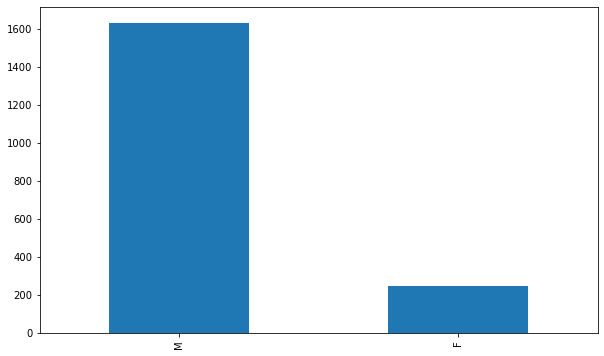

In [252]:
plt.figure(figsize=(10, 6))

df.sex_.value_counts().plot.bar();

## Insight Nº4

Conclusión: La gran mayoría de las victimas son de sexo masculino. Esto no significa que la comida preferida de los tiburones sean hombres. Sino porque los deportes marinos son practicados principalmente por hombres: